In [1]:
import cv2 
import numpy as np
import matplotlib.pyplot as plt


In [2]:
config_file = "C:\\Users\\Acer\\Desktop\\ObjectDetection\\ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt"
frozen_model = "C:\\Users\\Acer\\Desktop\\ObjectDetection\\frozen_inference_graph.pb"

In [3]:
model = cv2.dnn_DetectionModel(frozen_model, config_file)

In [4]:
classLabels  = []
file_name = "C:\\Users\\Acer\\Desktop\\ObjectDetection\\labels.txt"
with open(file_name, 'rt') as fpt :
    classLabels = fpt.read().rstrip('\n').split('\n')
    

In [5]:
print (classLabels)

['person', 'table', 'chair', 'dog', 'mirror', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'chairs', '', '', 'bench', 'dog', 'cat', 'puppy', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', '', 'skis', 'snowboard', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'chair', 'diningtable', 'chair', 'tvmonitor', 'laptop', 'table', 'remote', 'table', 'fan', 'microwave', 'monitor screen', '', 'mirror', 'laptop', 'keyboard', 'clock', '', 'scissors', 'hair drier', 'toothbrush', 'mirror']


#read an image 

In [6]:
model.setInputSize(320,320)
model.setInputScale(1.0/127.5)
model.setInputMean((127.5,127.5,127.5))
model.setInputSwapRB(True)

<dnn_Model 000002374D968230>

In [7]:
img = cv2.imread("C:\\Users\\Acer\\Desktop\\ObjectDetection\\image 1.jpeg")

In [8]:
#plt.imshow(img)

In [9]:
ClassIndex, confidence,bbox = model.detect(img, confThreshold = 0.6)

In [10]:
print(ClassIndex)

[1 1 1]


In [11]:
font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN
for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidence.flatten(), bbox):
    cv2.rectangle(img,boxes, (255, 0, 0), 2)
    cv2.putText(img, classLabels[ClassInd-1], (boxes[0]+10, boxes[1]+40),font, fontScale = font_scale, color=(0,255,0), thickness = 3)

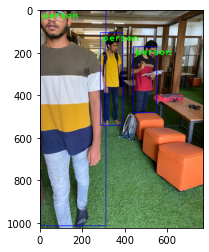

In [12]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [13]:
#video demo

In [14]:
cap = cv2.VideoCapture("C:\\Users\\Acer\\Desktop\\ObjectDetection\\v3.mp4")

In [15]:
cv2.VideoCapture(0)
#cap = cv2.VideoCapture(1)
#url = "http://26.128.176.37:8080/video"
#cap.open(url)

if not cap.isOpened():
    cap = cv2.VideoCapture(1)
if not cap.isOpened():
    raise IOError("Cannot open video")
    
font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN

while True:
    ret,frame = cap.read()
    
    ClassIndex, confidence, bbox = model.detect(frame, confThreshold=0.55)
    
    print(ClassIndex)
    if (len(ClassIndex)!=0):
        for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidence.flatten(), bbox):
            if (ClassInd <= 80):
                cv2.rectangle(frame, boxes, (255, 0, 0), 2)
                cv2.putText(frame, classLabels[ClassInd-1], (boxes[0]+10, boxes[1]+40), font, fontScale=font_scale, color=(0,255,0), thickness = 3)
    
    cv2.imshow("Object Detection Tutorial", frame)
    
    if (cv2.waitKey(2) & 0xFF == ord('q')):
        break
        
cap.release()
cv2.destroyAllWindows()


    

[ 1  1  1  1 64  1 84  1 62 62]
[ 1  1  1  1  1  1 64 62 84 62]
[ 1  1  1  1  1 64  1 84 62 62]
[ 1  1  1  1 64  1 84  1 62]
[ 1  1  1  1 64  1  1 62 84 62]
[ 1  1  1  1 64  1  1 84 62 62 84]
[ 1  1  1 64  1  1 62 84 62  1 84]
[ 1  1  1  1  1 62 64 84  1 62]
[ 1  1  1  1 64 62  1  1 84 62 84 62]
[ 1  1  1  1 64  1 62 84  1 62 84 62]
[ 1  1  1 64  1  1  1 84 62 62]
[ 1  1  1  1 64  1 62  1 62 84 62 84]
[ 1  1  1  1 64  1 62  1 62 64 84 84 84 84]
[ 1  1  1  1 64  1  1 84 84 62 84 62 84]
[ 1  1  1  1 64  1  1 84 62 84 62 84 84 62 84]
[ 1  1  1  1 64  1  1 84 84 62 84 84 62 62]
[ 1  1  1  1 64 84  1  1 84 62 62 84  1 62 64 84]
[ 1  1  1  1 64 84  1 84  1  1 84 64 62 84 62]
[ 1  1  1  1 64  1 84 84  1 84 62 84  1 62 64]
[ 1  1  1  1 64  1 84 84 62 84  1  1 64 62]
[ 1  1  1 64  1  1 84 62 84  1 84 62 84]
[ 1  1  1  1 64 84  1 62 84  1 84 62 84]
[ 1  1  1 84  1 64 84  1 62 84  1 84]
[ 1  1 84  1 84  1 64  1 84  1 62 84]
[ 1  1 84 84  1  1 64  1 84  1 62 84]
[ 1  1 84 84  1 64  1  1 84  1 62 6

KeyboardInterrupt: 